In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

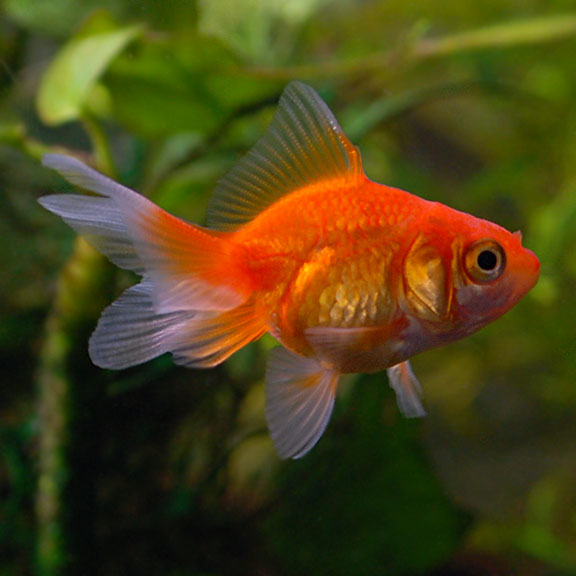

In [4]:
Image.open('goldfish.jpg')

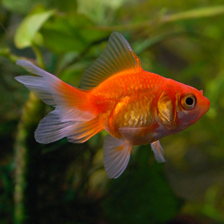

In [6]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [11]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [13]:
result = classifier.predict(gold_fish[np.newaxis,...])
result.shape

1/1 [==============================] - 0s 76ms/step


(1, 1001)

In [14]:
result

array([[ 0.22101435,  2.04749   ,  9.622563  , ..., -1.4621586 ,
        -0.28146598, -0.25984758]], dtype=float32)

In [15]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [16]:
with open('ImageNetLabels.txt','r') as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [17]:
image_labels[predicted_label_index]

'goldfish'

In [18]:
data_dir = tf.keras.utils.get_file('flower_photos', origin='datasets',  cache_dir='.', untar=True)

In [19]:
data_dir

'.\\datasets\\flower_photos'

In [20]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [21]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [24]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

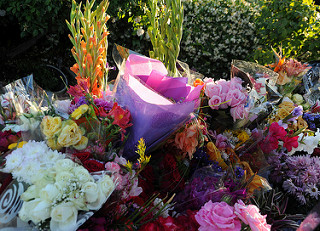

In [25]:
Image.open(str(roses[3]))

In [26]:
list(data_dir.glob('roses/*'))

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [28]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

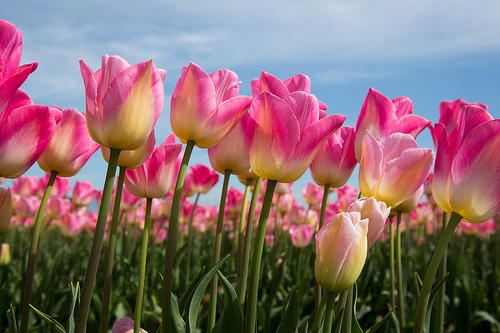

In [29]:
Image.open(str(tulips[3]))

In [30]:
flower_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'danidelion':list(data_dir.glob('sunflower/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [31]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [32]:
str(flower_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [34]:
img = cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [35]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [37]:
x, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [38]:
x[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [39]:
x = np.array(x)
y = np.array(y)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)

In [47]:
x_train = x_train / 255
x_test = x_test / 255

MemoryError: Unable to allocate 2.49 GiB for an array with shape (2217, 224, 224, 3) and data type float64

In [48]:
x_train[0]

array([[[163, 173, 223],
        [ 68,  72, 181],
        [163, 176, 225],
        ...,
        [104, 109, 188],
        [ 99, 119, 156],
        [122, 129, 179]],

       [[103, 102, 200],
        [ 49,  54, 149],
        [134, 150, 179],
        ...,
        [112, 115, 187],
        [ 96,  96, 179],
        [130, 137, 175]],

       [[ 51,  67, 141],
        [ 70,  84, 151],
        [153, 171, 204],
        ...,
        [146, 149, 201],
        [109,  99, 198],
        [174, 184, 204]],

       ...,

       [[ 28,  37,  41],
        [ 20,  27,  30],
        [ 99, 108, 119],
        ...,
        [ 73,  91, 102],
        [ 14,  33,  35],
        [  4,  27,  24]],

       [[ 30,  38,  43],
        [ 15,  22,  26],
        [ 66,  74,  81],
        ...,
        [ 51,  70,  84],
        [ 54,  72,  77],
        [  4,  24,  20]],

       [[ 52,  59,  72],
        [ 57,  62,  78],
        [ 22,  26,  38],
        ...,
        [ 62,  83,  98],
        [ 74,  99, 104],
        [ 19,  47,  41]]

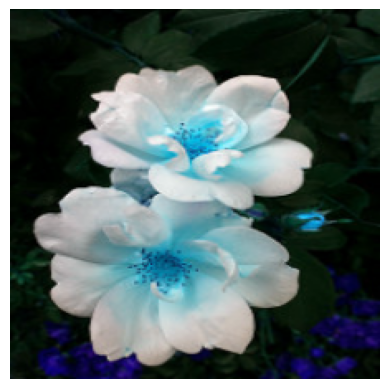

In [49]:
plt.axis('off')
plt.imshow(x[0])

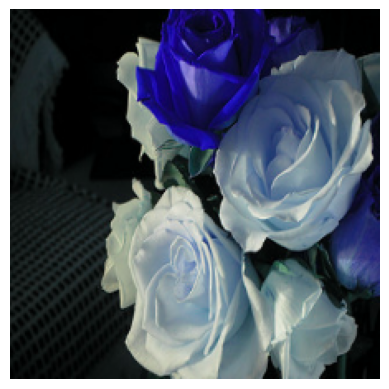

In [50]:
plt.axis('off')
plt.imshow(x[1])

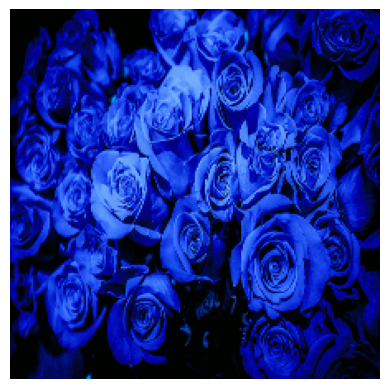

In [51]:
plt.axis('off')
plt.imshow(x[2])

In [54]:
predicted = classifier.predict(np.array([x[0],x[1],x[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 0s 124ms/step


array([795, 880, 795], dtype=int64)

Now take pre-trained model and retrain it using flowers images

In [55]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [56]:
num_of_flowers = 5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [60]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(x_train, y_train, epochs=1)

70/70 [==============================] - 92s 1s/step - loss: 1.0610 - acc: 0.5530


In [59]:
model.evaluate(x_test,y_test)

18/18 [==============================] - 24s 1s/step - loss: 1.1084 - acc: 0.5189


[1.1083797216415405, 0.5189189314842224]